<a href="https://colab.research.google.com/github/kushalnavghare/DSC-540-ADVNCD_ML/blob/master/Assignment_3_v3_Kushal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DSC540 Project 3

DePaul University  
Ilyas Ustun, PhD  
Chicago, IL  

## Rules
- Write your code under the corresponding questions. You are encouraged to use more than one cell.
- Provide explanation in a separate Markdown formatted cell.
- You can change the cell type by:
    - Click on the outer area of the cell type you want to change,
    - Go to the top, and select either Code or Markdown from the dropdown menu.
- Be concise in your explanations and conclusions.
- Write clear code and provide explanation to functions you create by using `#` comment sign.
- Try to answer the questions by yourself. Use documentation from pandas, sklearn and similar libraries to solve the problem.
- If you are stuck you can use different resources. Do not find an identical project and copy paste the solutions.
- Write your name at the beginning of the jupyter notebook.


Important:  
- **Do NOT share the solutions with other people.**
- **Do NOT share the solutions on the internet including but not limited to Github and other platforms.**
- Sign the Honor Pledge below indicating that you have agreed to these rules listed here, and any other ethical and honor rules as required by the university.



- **Deliverables:**
    1. The Python Jupyter notebook file named properly with your name. Example: dsc540_project1_john_doe.ipynb
    2. The HTML output of this code notebook names the same way. Example: dsc540_project1_john_doe.html
        - File -> Download as -> HTML  
        
        
**DO NOT zip the files.**

Good Luck!

### Name: Kushal Navghare

**Honor Pledge:**  
I pledge on my honor that I, **Student Name**, have followed the rules listed above, that I have not given or received any unauthorized assistance on this assignment.



## Project Description

In this project we will be analyzing CO and NOX gas emissions from a power plant. The variables, their meanings and some statistics are given in the table below.

![PowerPlantEmissionsFeaturesTable](PowerPlantEmissionsFeaturesTable.PNG)

## Import Libraries

**Import the usual libraries for pandas and plotting, and sklearn.**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics

In [3]:
import sklearn
sklearn.__version__

'1.2.2'

In [4]:
pd.set_option('display.max_columns', 100)
RANDOM_STATE = 0

### These are the packages I used

In [5]:
# Your package imports here

In [6]:
# gdrive mount
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
%pwd

'/content'

In [8]:
%cd drive/MyDrive/DSC-540/

/content/drive/MyDrive/DSC-540


> NOTE: For the Kernel RBF SVM hyper parameter tuning use these parameters in the questions:
        
        'C': [1, 10, 100, 1000]
        'gamma': [0.001, 0.01, 0.1, 1]

## Q1 [10]
- Read in the dataset
- How many rows and variables are there?


In [9]:
# read the data
raw_df = pd.read_csv("data/gas_emissions.csv")

In [10]:
raw_df.head()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,1.95320,1020.1,84.985,2.5304,20.116,1048.7,544.92,116.27,10.799,7.4491,113.250
1,1.21910,1020.1,87.523,2.3937,18.584,1045.5,548.50,109.18,10.347,6.4684,112.020
2,0.94915,1022.2,78.335,2.7789,22.264,1068.8,549.95,125.88,11.256,3.6335,88.147
3,1.00750,1021.7,76.942,2.8170,23.358,1075.2,549.63,132.21,11.702,3.1972,87.078
4,1.28580,1021.6,76.732,2.8377,23.483,1076.2,549.68,133.58,11.737,2.3833,82.515


In [11]:
raw_df.shape

(7384, 11)

There are 7384 rows and 11 variables.

#### Get the Data

**Use pandas to read in the datasets as a dataframe.**

In [12]:
df = pd.read_csv('data/gas_emissions.csv')

In [13]:
df.head()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,1.95320,1020.1,84.985,2.5304,20.116,1048.7,544.92,116.27,10.799,7.4491,113.250
1,1.21910,1020.1,87.523,2.3937,18.584,1045.5,548.50,109.18,10.347,6.4684,112.020
2,0.94915,1022.2,78.335,2.7789,22.264,1068.8,549.95,125.88,11.256,3.6335,88.147
3,1.00750,1021.7,76.942,2.8170,23.358,1075.2,549.63,132.21,11.702,3.1972,87.078
4,1.28580,1021.6,76.732,2.8377,23.483,1076.2,549.68,133.58,11.737,2.3833,82.515


,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,1.95320,1020.1,84.985,2.5304,20.116,1048.7,544.92,116.27,10.799,7.4491,113.250
1,1.21910,1020.1,87.523,2.3937,18.584,1045.5,548.50,109.18,10.347,6.4684,112.020
2,0.94915,1022.2,78.335,2.7789,22.264,1068.8,549.95,125.88,11.256,3.6335,88.147
3,1.00750,1021.7,76.942,2.8170,23.358,1075.2,549.63,132.21,11.702,3.1972,87.078
4,1.28580,1021.6,76.732,2.8377,23.483,1076.2,549.68,133.58,11.737,2.3833,82.515


#### Is there any missing data?

In [14]:
df.isna().sum()

AT      0
AP      0
AH      0
AFDP    0
GTEP    0
TIT     0
TAT     0
TEY     0
CDP     0
CO      0
NOX     0
dtype: int64

AT      0
AP      0
AH      0
AFDP    0
GTEP    0
TIT     0
TAT     0
TEY     0
CDP     0
CO      0
NOX     0
dtype: int64

#### What is the average value of AP for those points who have CO levels above 3 $mg/m^3$?

In [15]:
df.head()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,1.95320,1020.1,84.985,2.5304,20.116,1048.7,544.92,116.27,10.799,7.4491,113.250
1,1.21910,1020.1,87.523,2.3937,18.584,1045.5,548.50,109.18,10.347,6.4684,112.020
2,0.94915,1022.2,78.335,2.7789,22.264,1068.8,549.95,125.88,11.256,3.6335,88.147
3,1.00750,1021.7,76.942,2.8170,23.358,1075.2,549.63,132.21,11.702,3.1972,87.078
4,1.28580,1021.6,76.732,2.8377,23.483,1076.2,549.68,133.58,11.737,2.3833,82.515


In [16]:
avg_ap_abov_3_co = df[(df.CO>3)]['AP'].mean()

In [17]:
print(f"Average AP value of points above 3mg/m3 CO is: {avg_ap_abov_3_co}")

Average AP value of points above 3mg/m3 CO is: 1015.690017349063


1015.690017349063

#### Create a correlation map between the variables. Which variables have high correlation (> |0.9|)?

In [18]:
corr_df = df.corr()

In [19]:
correlated_variables = []
for index, row in corr_df.iterrows():
    for col, value in row.items():
        if value > 0.9 and index != col:
            correlated_variables.append((index, col, value))

In [20]:
len(correlated_variables)

14

In [21]:
correlated_variables

[('AFDP', 'TIT', 0.9151277689704831),
 ('AFDP', 'CDP', 0.9229906433225206),
 ('GTEP', 'TEY', 0.9323368176106199),
 ('GTEP', 'CDP', 0.9381416164065439),
 ('TIT', 'AFDP', 0.9151277689704831),
 ('TIT', 'TEY', 0.9518125918356007),
 ('TIT', 'CDP', 0.9515900311506349),
 ('TEY', 'GTEP', 0.9323368176106199),
 ('TEY', 'TIT', 0.9518125918356007),
 ('TEY', 'CDP', 0.9912073274723122),
 ('CDP', 'AFDP', 0.9229906433225206),
 ('CDP', 'GTEP', 0.9381416164065439),
 ('CDP', 'TIT', 0.9515900311506349),
 ('CDP', 'TEY', 0.9912073274723122)]

#### Create a scatter plot of 'TEY' vs 'CDP'

Text(0, 0.5, 'TEY')

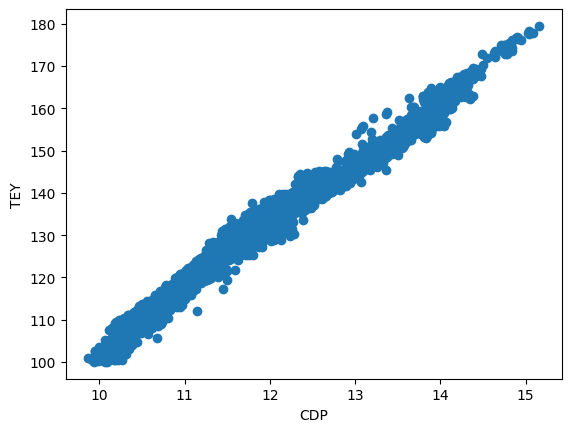

In [22]:
plt.scatter(df.CDP, df.TEY)
plt.xlabel('CDP')
plt.ylabel("TEY")

<AxesSubplot:xlabel='CDP', ylabel='TEY'>

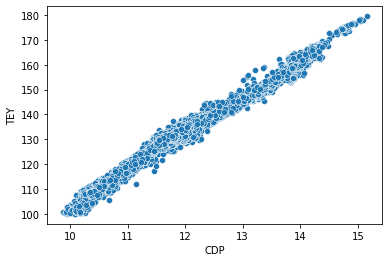

#### Create histograms for CO and NOX.

Text(0.5, 1.0, 'Histogram of CO')

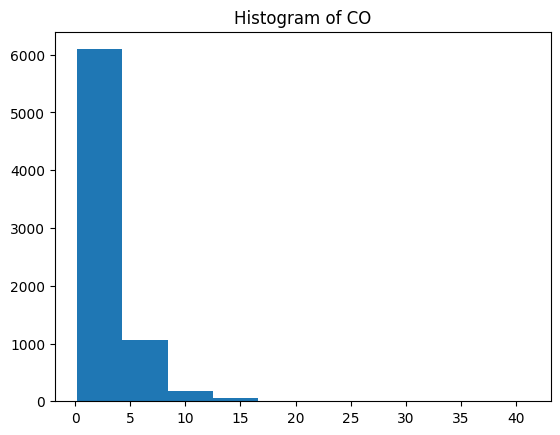

In [23]:
plt.hist(df.CO)
plt.title("Histogram of CO")

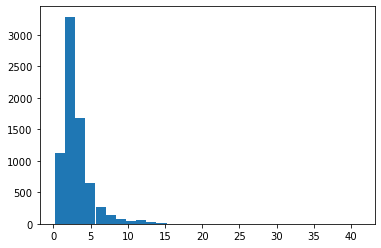

Text(0.5, 1.0, 'Histogram of NOX')

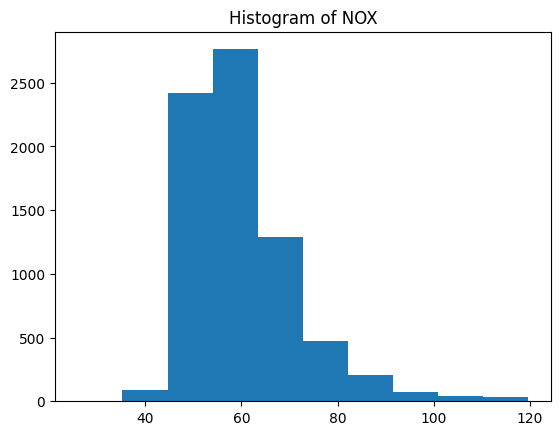

In [24]:
plt.hist(df.NOX)
plt.title("Histogram of NOX")

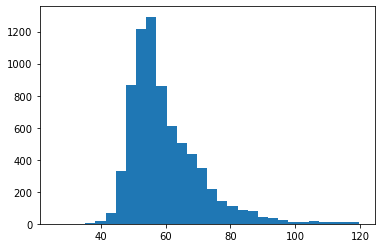

#### Create a sctter plot of CO vs NOX.

Text(0, 0.5, 'NOX')

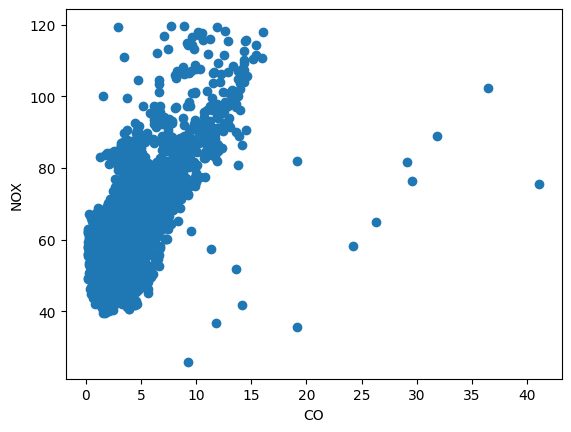

In [25]:
plt.scatter(df.CO, df.NOX)
plt.xlabel("CO")
plt.ylabel("NOX")

<AxesSubplot:xlabel='NOX', ylabel='CO'>

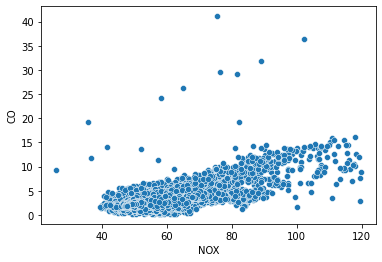

### Prepare data for machine learning

- We will predict CO using all the other variables.
- NOX, which is another emission gas, will not be used as predictor.
- CO is a continuous variable, thus we will be doing regression.
- Many of algorithms that do classification also have regression counterparts.

In [26]:
y = df.CO
X = df.drop(['CO', 'NOX'], axis=1)

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=RANDOM_STATE)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.20, random_state=RANDOM_STATE)

In [28]:
# Standardization of the data
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(X_train)
X_train = ss.transform(X_train)
X_val = ss.transform(X_val)
X_test = ss.transform(X_test)

In [29]:
X_train.shape

(5316, 9)

In [30]:
X_val.shape

(1329, 9)

In [31]:
X_test.shape

(739, 9)

## Utility Functions

You can create helper functions.
For example, create functions that take the score and store it in a dataframe for a specific model.

In [32]:
def getMetricScores(model_object, X, y):
  predicted = model_object.predict(X)
  r2 = r2_score(y, predicted)
  rmse = np.sqrt(mean_squared_error(y, predicted))
  print(f"R2 score = {r2:.2f}")
  print(f"RMSE = {rmse:.2f}")
  return r2, rmse

## Q2 [10]

- Apply Linear Regression. Predict CO emission using other variables.
    - What is the model $R^2$ on training data?
    - What is the $R^2$ on validation data?
    - What is the Root Mean Squared Error (RMSE) on training data?
    - What is the RMSE on validation data?
    
> - $R^2$ higher is better. ($R^2$ is % variation in data being explained)  
> - RMSE lower is better. (RMSE (Root Mean Squared Error) is error, meaning the difference between predictions and actual data)  

Hint:  
- You can use the `r2_score` and `mean_squared_error` methods in `sklearn.metrics`.   
- You need to take the square root of Mean Squared Error to get to RMSE. (MSE $\rightarrow$ square root $\rightarrow$ RMSE)

In [33]:
from sklearn.linear_model import LinearRegression

In [34]:
from sklearn.metrics import r2_score, mean_squared_error

In [35]:
# fit model
lin_model = LinearRegression()
lin_model.fit(X_train, y_train)

LinearRegression()

In [36]:
print("Train metrics")
getMetricScores(lin_model, X_train, y_train)

Train metrics
R2 score = 0.66
RMSE = 1.27


(0.6640090820784397, 1.2720122104103533)

In [37]:
# predict and get metrics
print("Test metrics")
getMetricScores(lin_model, X_test, y_test)

print("\nVal metrics")
getMetricScores(lin_model, X_val, y_val)

Test metrics
R2 score = 0.49
RMSE = 1.66

Val metrics
R2 score = 0.65
RMSE = 1.39


(0.646343190818214, 1.3884894690085985)

## Q3 [10]

- Apply Random Forest Regression with 100 trees. Predict CO emission using other variables.
    - What is the model $R^2$?
    - What is the $R^2$ on validation data?
    - What is the RMSE on training data?
    - What is the RMSE on validation data?

- Is training and validation score close? If not what might be the problem?
- If there is a large gap, try to decrease the gap by changing some hyperparameters of the Random Forest model. (In this analysis, any difference more than 0.10 $R^2$ difference can be assumed to be large.)
    - Once you reach a difference of less than or close to 0.10 between training $R^2$ and validation $R^2$ you can stop.
    - During this process your training score will probably decrease, and that is OK.

In [38]:
from sklearn.ensemble import RandomForestRegressor

In [39]:
estimator = RandomForestRegressor(n_estimators=100, random_state=RANDOM_STATE)

In [40]:
# fit model
estimator.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

In [41]:
print("Train metrics")
getMetricScores(estimator, X_train, y_train)

Train metrics
R2 score = 0.96
RMSE = 0.42


(0.9635412068046666, 0.419014117669241)

In [42]:
# predict and get metrics
print("Test metrics")
getMetricScores(estimator, X_test, y_test)

print("\nVal metrics")
getMetricScores(estimator, X_val, y_val)

Test metrics
R2 score = 0.53
RMSE = 1.59

Val metrics
R2 score = 0.76
RMSE = 1.15


(0.7558012206331827, 1.1537808394478866)

There's a huge gap in train and val scores. This means the model is not generalized on the dataset. This means the model might be overfitting.

This can be reduced by tuning `max_depth`, `n_estimators`, `min_samples_split`.

In [43]:
estimator.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}

In [44]:
list(range(1, 11, 1))

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [45]:
max_depth_lst = list(range(1, 8, 1))
n_estimators_lst = list(range(50, 151, 15))

In [46]:
for i, j in zip(max_depth_lst, n_estimators_lst):
  print(i, j)

1 50
2 65
3 80
4 95
5 110
6 125
7 140


In [47]:
train_r2 = []
val_r2 = []
for max_depth, n_estimators in zip(max_depth_lst, n_estimators_lst):
  params = {'max_depth':max_depth,
            'n_estimators':n_estimators}
  estimator = RandomForestRegressor(**params, random_state=RANDOM_STATE)
  estimator.fit(X_train, y_train)
  tr_r2, _ = getMetricScores(estimator, X_train, y_train)
  vl_r2, _ =getMetricScores(estimator, X_val, y_val)
  train_r2.append(tr_r2)
  val_r2.append(vl_r2)

R2 score = 0.49
RMSE = 1.57
R2 score = 0.48
RMSE = 1.69
R2 score = 0.70
RMSE = 1.19
R2 score = 0.69
RMSE = 1.31
R2 score = 0.77
RMSE = 1.06
R2 score = 0.72
RMSE = 1.25
R2 score = 0.81
RMSE = 0.97
R2 score = 0.74
RMSE = 1.19
R2 score = 0.83
RMSE = 0.91
R2 score = 0.75
RMSE = 1.18
R2 score = 0.87
RMSE = 0.78
R2 score = 0.75
RMSE = 1.17
R2 score = 0.90
RMSE = 0.70
R2 score = 0.75
RMSE = 1.16


Text(0.5, 0, 'n_estimator')

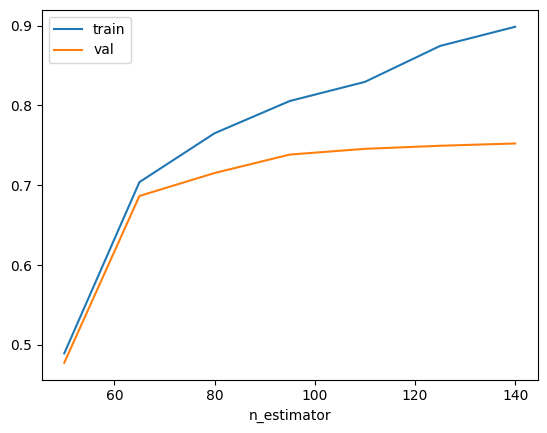

In [48]:
plt.plot(n_estimators_lst, train_r2, label='train')
plt.plot(n_estimators_lst, val_r2, label='val')
plt.legend()
plt.xlabel("n_estimator")

Text(0.5, 0, 'max_depth')

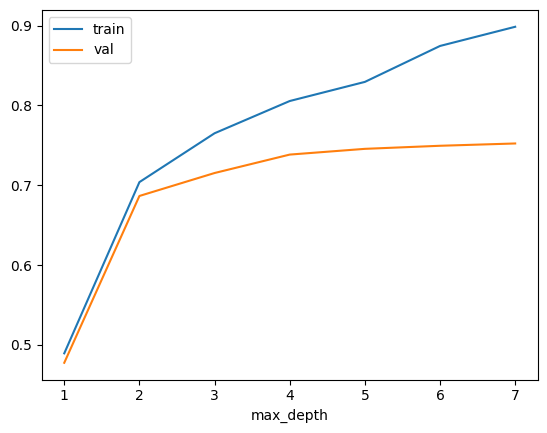

In [49]:
plt.plot(max_depth_lst, train_r2, label='train')
plt.plot(max_depth_lst, val_r2, label='val')
plt.legend()
plt.xlabel("max_depth")

In [50]:
estimator.fit(X_train, y_train)

RandomForestRegressor(max_depth=7, n_estimators=140, random_state=0)

In [51]:
print("Train scores")
getMetricScores(estimator, X_train, y_train)

Train scores
R2 score = 0.90
RMSE = 0.70


(0.8985244311449692, 0.6990500295590756)

In [52]:
print("Val scores")
getMetricScores(estimator, X_val, y_val)

Val scores
R2 score = 0.75
RMSE = 1.16


(0.75228612908038, 1.162055153444533)

In [53]:
from sklearn.model_selection import RandomizedSearchCV

In [54]:
# define param grid
param_grid = {
    'n_estimators': [int(x) for x in np.linspace(start=100, stop=1000, num=10)],
    'max_depth': [int(x) for x in np.linspace(10, 110, num=11)],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
    }

In [55]:
# tree initiate
rf_model = RandomForestRegressor(random_state = RANDOM_STATE)

In [56]:
# Create RandomizedSearchCV
random_cv = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=param_grid,
    n_iter=10,
    scoring='r2',
    cv=2,
    n_jobs=-1,
    random_state=RANDOM_STATE,
    verbose=2
)

In [57]:
# random CV
random_cv.fit(X_train, y_train)

Fitting 2 folds for each of 10 candidates, totalling 20 fits


RandomizedSearchCV(cv=2, estimator=RandomForestRegressor(random_state=0),
                   n_jobs=-1,
                   param_distributions={'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000]},
                   random_state=0, scoring='r2', verbose=2)

In [58]:
cv_results = random_cv.cv_results_

In [59]:
cv_results

{'mean_fit_time': array([29.69323528, 16.64877784, 29.23045111, 21.43521786, 15.12516105,
        21.54526556, 28.91539359,  4.30878901, 32.2199924 , 22.77471781]),
 'std_fit_time': array([0.09979999, 0.10569942, 0.00131512, 0.0103097 , 0.01683414,
        0.07961142, 0.08689833, 0.01586843, 0.00167203, 0.05808854]),
 'mean_score_time': array([0.37645161, 0.2674439 , 0.42318773, 0.32961833, 0.25359905,
        0.27053583, 0.4266907 , 0.06862974, 0.51131952, 0.26789653]),
 'std_score_time': array([0.00977528, 0.02328491, 0.00050044, 0.01385915, 0.05090368,
        0.0137912 , 0.00201952, 0.00054169, 0.00857556, 0.03016579]),
 'param_n_estimators': masked_array(data=[800, 600, 900, 700, 600, 800, 1000, 200, 1000, 700],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value='?',
             dtype=object),
 'param_min_samples_split': masked_array(data=[10, 10, 10, 10, 5, 10, 2, 2, 5, 10],
              mask=[False,

In [60]:
train_losses = cv_results['split0_test_score']
val_losses = cv_results['split1_test_score']

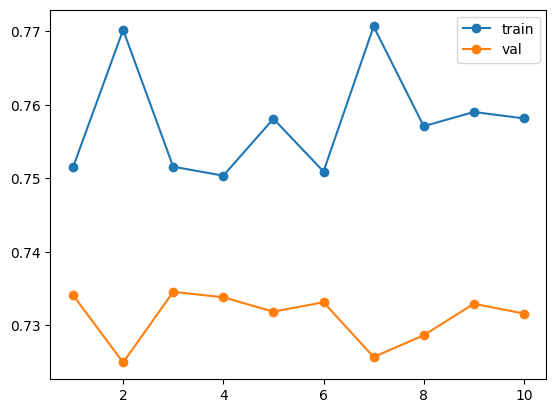

In [61]:
plt.plot(range(1, len(train_losses) + 1), train_losses, label='train', marker='o')
plt.plot(range(1, len(val_losses) + 1), val_losses, label='val', marker='o')
plt.legend()

In [62]:
random_cv.best_estimator_

RandomForestRegressor(max_depth=30, min_samples_leaf=4, n_estimators=1000,
                      random_state=0)

In [63]:
best_estimator = random_cv.best_estimator_

In [64]:
print("Train metrics")
getMetricScores(best_estimator, X_train, y_train)

Train metrics
R2 score = 0.87
RMSE = 0.78


(0.8742584869766808, 0.7781563253719932)

In [65]:
print("Test metrics")
getMetricScores(best_estimator, X_val, y_val)

Test metrics
R2 score = 0.76
RMSE = 1.15


(0.7564271230622819, 1.1523012711189276)

## Q4 [10]

- Apply Support Vector Regression. Predict CO emission using other variables.
    - What is the model $R^2$?
    - What is the $R^2$ on validation data?
    - What is the RMSE on training data?
    - What is the RMSE on validation data?
    
- Do this for each of the models listed below using the default parameters:  
    1. **Linear kernel SVR**  
    2. **Polynomial kernel SVR**  
    3. **RBF kernel SVR**

In [66]:
from sklearn.svm import SVR

### Linear SVM Regressor

In [67]:
estimator = SVR(kernel='linear')
estimator

SVR(kernel='linear')

In [68]:
# fit model
estimator.fit(X_train, y_train)

SVR(kernel='linear')

In [69]:
print("Train metrics")
getMetricScores(estimator, X_train, y_train)

Train metrics
R2 score = 0.62
RMSE = 1.34


(0.6244164650454904, 1.3448714796326715)

In [70]:
print("Val metrics")
getMetricScores(estimator, X_val, y_val)

Val metrics
R2 score = 0.60
RMSE = 1.47


(0.6021524213732284, 1.4726852520481604)

In [71]:
print("Val metrics")
getMetricScores(estimator, X_val, y_val)

Val metrics
R2 score = 0.60
RMSE = 1.47


(0.6021524213732284, 1.4726852520481604)

### Polynomial Kernel SVM Regressor

In [72]:
from sklearn.svm import SVR
estimator = SVR(kernel='poly')

In [73]:
# fit model
estimator.fit(X_train, y_train)

SVR(kernel='poly')

In [74]:
print("Train metrics")
getMetricScores(estimator, X_train, y_train)

Train metrics
R2 score = 0.74
RMSE = 1.12


(0.7404852376508417, 1.1179143857689047)

In [75]:
print("Val metrics")
getMetricScores(estimator, X_val, y_val)

Val metrics
R2 score = 0.73
RMSE = 1.21


(0.7310487212257806, 1.2108445318365073)

### RBF Kernel SVM Regressor

In [76]:
from sklearn.svm import SVR
estimator = SVR(kernel='rbf')

In [77]:
# fit model
estimator.fit(X_train, y_train)

SVR()

In [78]:
print("Train metrics")
getMetricScores(estimator, X_train, y_train)

Train metrics
R2 score = 0.77
RMSE = 1.06


(0.7653225070588421, 1.0630733502205558)

In [79]:
print("Val metrics")
getMetricScores(estimator, X_val, y_val)

Val metrics
R2 score = 0.75
RMSE = 1.17


(0.7476173201040636, 1.1729550025939752)

### Q5 [10]

- Take RBF Kernel SVM and perform hyperparameter tuning. See if you can increase the $R^2$ score.   
    - Use:  
          'C': [1, 10, 100, 1000]
          'gamma': [0.001, 0.01, 0.1, 1]  

    - What is the model $R^2$?
    - What is the $R^2$ on validation data?
    - What is the RMSE on training data?
    - What is the RMSE on validation data?

In [80]:
from sklearn.model_selection import GridSearchCV

In [81]:
# model initiate
svr_rbf_kernel = SVR(kernel='rbf')

In [82]:
# define params
param_grid = {
    'C': [1, 10, 100, 1000],
    'gamma': [0.001, 0.01, 0.1, 1]
}

In [83]:
# grid search
grid_search = GridSearchCV(
    estimator=svr_rbf_kernel,
    param_grid=param_grid,
    scoring='r2',
    cv=5
)

In [84]:
# fit grid search
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [1, 10, 100, 1000],
                         'gamma': [0.001, 0.01, 0.1, 1]},
             scoring='r2')

In [85]:
# best params
grid_search.best_params_

{'C': 1000, 'gamma': 0.01}

In [86]:
# save best model
best_model = grid_search.best_estimator_

In [87]:
print("Train metrics")
getMetricScores(best_model, X_train, y_train)

Train metrics
R2 score = 0.79
RMSE = 1.00


(0.7922405098710182, 1.000248586950824)

In [88]:
print("val metrics")
getMetricScores(best_model, X_val, y_val)

val metrics
R2 score = 0.76
RMSE = 1.15


(0.7568500533369283, 1.1513004313828628)

## Q6 [10]

- Apply PCA and transform the data.
    - For PCA we need to decide on the number of  components. Take sufficient number of components based on variance explained
        - generally it is chosen as the number of components that can explain 90% of the variance
        - or cross-validation accuracy using an ML model.

- Use the PCA transformed data to perform regression. Use the models:
    - Linear Regression
    - Random Forest Regression (Optional to do hyper parameter tuning)
    - RBF Kernel Support Vector Regression (Optional to do hyper parameter tuning)
  
- For each model:  
    - What is the model $R^2$?
    - What is the $R^2$ on validation data?
    - What is the RMSE on training data?
    - What is the RMSE on validation data?
    
- Compare these models with their counterparts obtained before. For example: Compare `PCA RBF SVR` with the `RBF SVR` model from before. Do you observe any change in performance? Please explain.


In [89]:
from sklearn.decomposition import PCA

In [90]:
pca = PCA(n_components=None)

pca.fit(X_train)
X_train_pca = pca.transform(X_train)
X_val_pca = pca.transform(X_val)
X_test_pca = pca.transform(X_test)

[0.58158952 0.78924196 0.88751722 0.94337792 0.98704348 0.9959942
 0.99975821 0.99992456 1.        ]


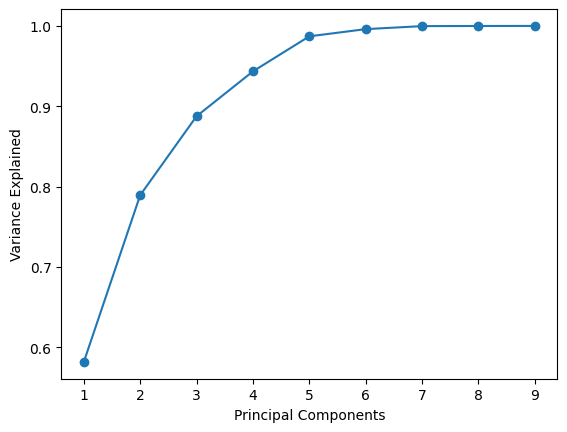

In [91]:
print(pca.explained_variance_ratio_.cumsum())
plt.plot(pca.explained_variance_ratio_.cumsum(), '-o');
plt.xticks(ticks= range(X_train_pca.shape[1]), labels=[i+1 for i in range(X_train_pca.shape[1])])
plt.xlabel('Principal Components')
plt.ylabel('Variance Explained')
plt.show()

Choose the number of components.

Number of components = 5

In [92]:
X_train_pca2 = X_train_pca[:, 0:5]
X_val_pca2 = X_val_pca[:, 0:5]
X_test_pca2 = X_test_pca[:, 0:5]

**Linear Regression with PCA transformed data**

In [93]:
lin_pca_model = LinearRegression()

In [94]:
# fit model
lin_pca_model.fit(X_train_pca2, y_train)

LinearRegression()

In [95]:
lin_pca_model.score(X_train_pca2, y_train)

0.6557906042002006

In [96]:
print("Train metrics")
getMetricScores(lin_pca_model, X_train_pca2, y_train)

Train metrics
R2 score = 0.66
RMSE = 1.29


(0.6557906042002006, 1.2874751982855395)

In [97]:
print("Val metrics")
getMetricScores(lin_pca_model, X_val_pca2, y_val)

Val metrics
R2 score = 0.63
RMSE = 1.41


(0.6333206399655548, 1.4138222446020623)

**RF Regression with PCA transformed data**

In [98]:
rf_pca_model = RandomForestRegressor(random_state=RANDOM_STATE)

In [99]:
rf_pca_model.fit(X_train_pca2, y_train)

RandomForestRegressor(random_state=0)

In [100]:
print("Train scores")
getMetricScores(rf_pca_model, X_train_pca2, y_train)

Train scores
R2 score = 0.96
RMSE = 0.42


(0.9630548121704725, 0.4217998787395343)

In [101]:
print("Val scores")
getMetricScores(rf_pca_model, X_val_pca2, y_val)

Val scores
R2 score = 0.74
RMSE = 1.20


(0.7372337558608612, 1.1968407422860916)

**SVM Regression with PCA transformed data**

## Q7 [10]

#### Let's do  classification

We will convert CO target values into binary form by comparing them to a threshold. $ 0 - 3  mg/m^3$ is the range of max 8-hour avg. ambient CO in most US cities. So let's take that.  
[CO Levels of Concern in Government Recommendations and Regulations](https://www.carbonmonoxidekills.com/are-you-at-risk/carbon-monoxide-levels/)

In [ ]:
from sklearn.preprocessing import Binarizer

In [ ]:
binarizer = Binarizer(threshold=3)

In [ ]:
y_train_cat = binarizer.transform(y_train.values.reshape(-1,1)).ravel()
y_val_cat = binarizer.transform(y_val.values.reshape(-1,1)).ravel()
y_test_cat = binarizer.transform(y_test.values.reshape(-1,1)).ravel()

In [ ]:
y_train_cat = pd.Series(y_train_cat)

<AxesSubplot:>

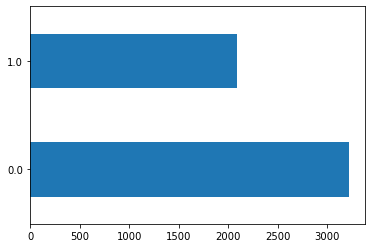

In [ ]:
y_train_cat.value_counts().plot.barh()

### Fit RBF Kernel SVM Classifier

#### 1. Standardized training data
- Using the standardized training data perform grid search:
    - Find the best combination of the `C` and `gamma` hyper-parameters.  
- For the best model:
    - Either using the confusion matrix or the methods in `sklearn.metrics` get the following metrics on the validation set:
     - Create confusion matrix
     - Recall (Sensitivity)
     - Specificity
     - Precision
     - Balanced Accuracy
     - F1 Score
     

#### 2. PCA transformed training data
- Using the **pca** transformed training data `X_train_pca2` perform grid search:
    - Find the best combination of the `C` and `gamma` hyper-parameters.  
- For the best model:
    - Either using the confusion matrix or the methods in `sklearn.metrics` get the following metrics on the validation set `X_val_pca2`:
         - Create confusion matrix
         - Recall (Sensitivity)
         - Specificity
         - Precision
         - Balanced Accuracy
         - F1 Score


In [ ]:
from sklearn.svm import SVC

In [ ]:
estimator = SVC(kernel ='rbf')

#### SVC Model 1

#### SVC Model 2

## Q8 [10]

- For regression:
    - Think of other ways of improving the regression performance and list at least two possibilities.
    - You can use any of the datasets we have been using (standardized data, PCA transformed data), or re-create your own set from the original.
    - Implement both of the methods you proposed.
    - Is the validation performance increasing? For performance comparison you can use any regression performance metric that you deem to be appropriate.
    - Optional: Apply different methods, ideas as you see fit and see if the validation performance is improving.

In [ ]:
# YOUR CODE

## Q9 [10]

- For classification:
    - Try at least one classifier other than SVM (RF, GBM, Logistic Regression, etc).
    - Think of other ways of improving the regression performance and list at least two possibilities.
    - You can use any of the datasets we have been using (standardized data, PCA transformed data), or re-create your own set from the original.
    - Implement both of the methods you proposed.
    - Is the validation performance increasing? For performance comparison you can use any regression performance metric that you deem to be appropriate.
    - Optional: Apply different methods, ideas as you see fit and see if the validation performance is improving.

In [ ]:
# YOUR CODE

## Q10 [10]

- Choose the best 2 regressors among the trained regressions models:
- Create a table summarizing results on the **test** set for regression (with target variables in `y_test`):
    - Show the R^2 and RMSE performance metrics on test data for each model.
- Which model is best for regression? Is this in line with your analysis (the validation performance of the models) or is this not expected?



- Choose the best 2 classifiers among the trained classification models:
- Create a table summarizing results on the **test** set for classification (with target variables in `y_test_cat`):
    - Show the classification performance metrics (accuracy, recall, precision, f1-score, etc.) on test data for each model.
- Which model is best for classification? Is this in line with your analysis (the validation performance of the models) or is this not expected?



> Note that the same transformation used during training should be applied on the testing set. (If you applied PCA on training data for the selected model, you need to apply PCA on the testing set as well.)



In [ ]:
# YOUR CODE

- What did you learn in this project? Any suggestions?

In [ ]:
# Your comments

# Thank you
Ilyas Ustun  
twitter: \_ilyas\_ustun\_